In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

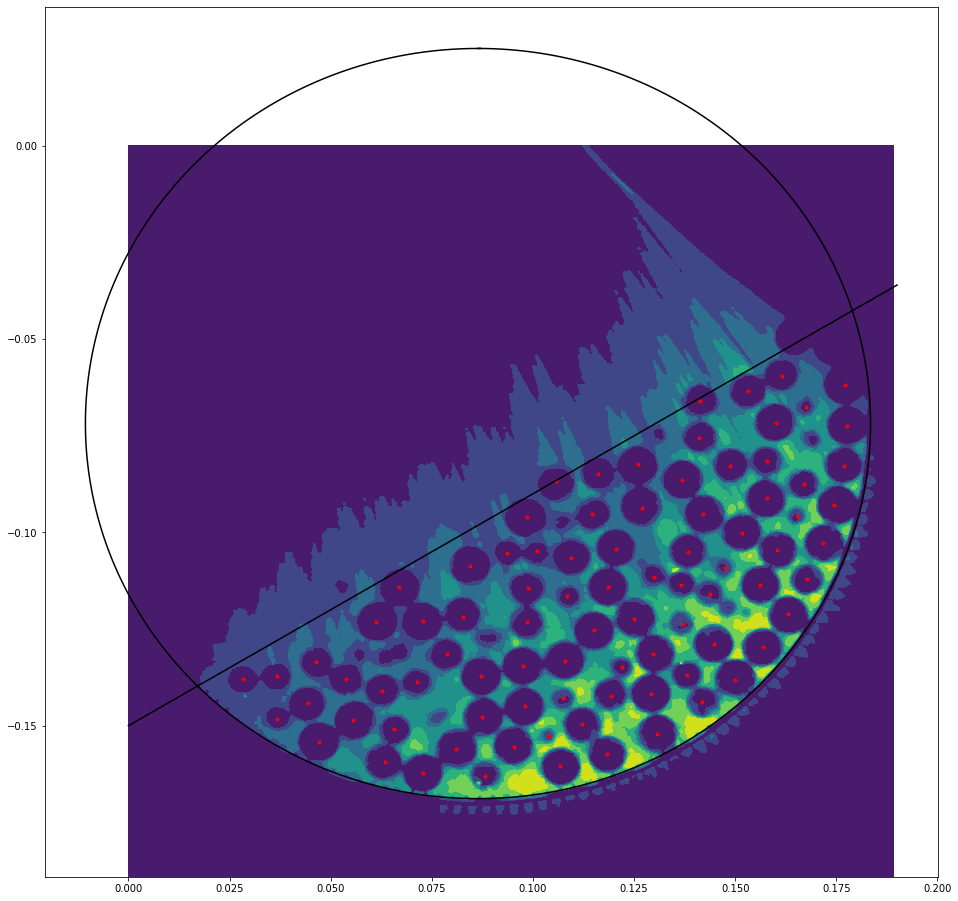

In [14]:
background_image = cv2.imread('Os4-S3 Camera000000.tif',0).astype(np.float64)
#x and z coordinates:

xbi, zbi = np.meshgrid(np.arange(0.0,1024,1),np.arange(0.0,1024,1))

#importing coarse grain data:

coarse_grain_data = np.loadtxt('rhobarc25.dat')


#importing point data:

point_data = np.loadtxt('point_data/point_data_0.dat')
#print(point_data)

pixel2real = 0.0001848337

Xu = point_data[:,0]*pixel2real
Zu = -point_data[:,1]*pixel2real

xbi *= pixel2real
zbi *= -pixel2real


dt = 0.01
xc = 467.5*pixel2real
zc = -388.6*pixel2real
#r = 524.8*pixel2real #true radius
#r = 480*pixel2real
R = 525*pixel2real

#R = 400*pixel2real
theta = np.arange(0,2*3.14159+dt,dt)
xcircle = xc + R*np.sin(theta)
zcircle = zc + R*np.cos(theta)
xline = np.arange(0,0.2,0.01)
m = 0.6
#c = -0.155
c= -0.15

#c = -0.17
yline = xline*m + c


plt.figure(figsize=(16,16))
plt.contourf(xbi,zbi,background_image)
plt.plot(Xu,Zu,'.',color = 'r')
plt.plot(xcircle,zcircle,'k')
plt.plot(xline,yline,'k')
#boundary geometry

In [15]:
print((Xu-xc)**2 + (Zu-zc)**2 <= R**2)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


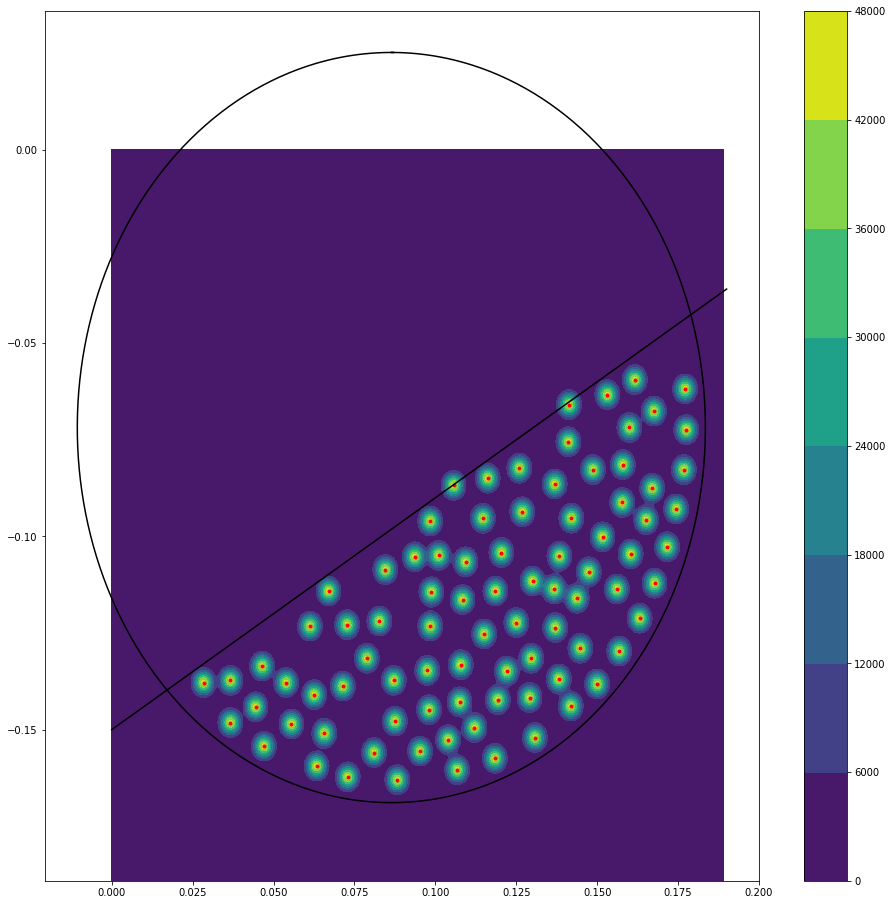

In [16]:
#without renormalization:

Nparticles = point_data.shape[0]
rho_orig = xbi*0
cr = 0.006

for i in range(0,Nparticles):

    #check if particle is in zone:
    r = np.sqrt( (xbi-Xu[i])**2 + (zbi-Zu[i])**2 )
    r[r>cr] = cr
    density_orig = -3*(r/cr)**4 + 8*(r/cr)**3 -6*(r/cr)**2 + 1

    #renormalizing:
    density_orig /= np.sum(np.sum(density_orig))*pixel2real**2            
    rho_orig += density_orig

plt.figure(figsize=(16,16))
plt.contourf(xbi,zbi,rho_orig)

plt.plot(Xu,Zu,'.',color = 'r')
plt.plot(xline,yline,'k')
plt.plot(xcircle,zcircle,'k')
plt.colorbar()

In [17]:
#coarse graining without renormalisation


xbi, zbi = np.meshgrid(np.arange(0.0,1024,5),np.arange(0.0,1024,5))

xbi *= pixel2real
zbi *= -pixel2real

cr = 0.1
rho_orig = xbi*0


for i in range(0,Nparticles):

    #check if particle is in zone:
    r = np.sqrt( (xbi-Xu[i])**2 + (zbi-Zu[i])**2 )
    r[r>cr] = cr
    density_orig = -3*(r/cr)**4 + 8*(r/cr)**3 -6*(r/cr)**2 + 1

    #renormalizing:
    density_orig /= np.sum(np.sum(density_orig))*pixel2real**2            
    rho_orig += density_orig



#coarse graining with renormalized Lucy function:
Nparticles = point_data.shape[0]
rho = xbi*0
for i in range(0,Nparticles):

    #check if particle is in zone:
    if Xu[i]*m + c >= Zu[i]:
        if (Xu[i]-xc)**2 + (Zu[i]-zc)**2 <= R**2:
            r = np.sqrt( (xbi-Xu[i])**2 + (zbi-Zu[i])**2 )
            r[r>cr] = cr
            r[xbi*m+c<=zbi] = cr
            r[(xbi-xc)**2 + (zbi-zc)**2 >= R**2] = cr
            density = -3*(r/cr)**4 + 8*(r/cr)**3 -6*(r/cr)**2 + 1

            #renormalizing:
            density /= np.sum(np.sum(density))*pixel2real**2            
            rho += density



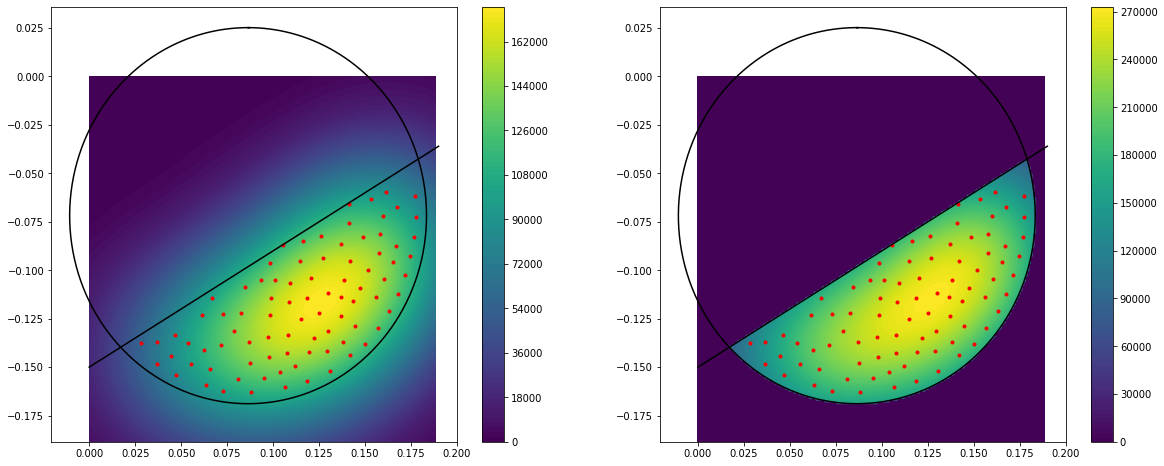

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.contourf(xbi,zbi,rho_orig,levels=100)

plt.plot(Xu,Zu,'.',color = 'r')
plt.plot(xline,yline,'k')
plt.plot(xcircle,zcircle,'k')
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(xbi,zbi,rho,levels=100)

plt.plot(Xu,Zu,'.',color = 'r')
plt.plot(xline,yline,'k')
plt.plot(xcircle,zcircle,'k')
plt.colorbar()